# Question 1: To what extent does a high ESG rating correlate with economic performance?

In [65]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import spearmanr


# Read the XLS file
data = pd.read_csv('Model.csv')

# Show the first few rows
display(data)

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk
0,MMM,3M Company,17.295145,17.579748,2.451300e+10,1.010200e+10,4.420000e+09,5.189000e+09,7.474258e+10,Industrials,43.0,Severe
1,AOS,A.O. Smith Corporation,17.988981,16.044226,3.818100e+09,1.456100e+09,5.336000e+08,7.775000e+08,9.372444e+09,Industrials,26.8,Medium
2,ABT,Abbott Laboratories,16.912418,25.073645,4.234400e+10,2.367800e+10,1.345100e+10,1.100250e+10,2.243860e+11,Healthcare,20.4,Medium
3,ABBV,AbbVie Inc.,75.154160,14.869744,5.633400e+10,3.964500e+10,4.238000e+09,2.671800e+10,3.190710e+11,Healthcare,24.3,Medium
4,ACN,Accenture plc,24.043730,20.711443,6.722149e+10,2.163372e+10,7.683453e+09,1.147250e+10,1.824300e+11,Technology,11.1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
438,XYL,Xylem Inc.,31.673971,24.338947,8.562000e+09,3.212000e+09,8.900000e+08,1.683000e+09,2.813358e+10,Industrials,22.9,Medium
439,YUM,"Yum! Brands, Inc.",28.272032,24.273027,7.549000e+09,3.584000e+09,1.486000e+09,2.714000e+09,4.110354e+10,Consumer Cyclical,20.5,Medium
440,ZBRA,Zebra Technologies Corporation,23.976423,15.216957,4.981000e+09,2.413000e+09,5.280000e+08,9.370000e+08,1.248306e+10,Technology,9.9,Negligible
441,ZBH,"Zimmer Biomet Holdings, Inc.",22.911964,11.802325,7.678600e+09,5.498900e+09,9.038000e+08,2.590300e+09,2.008086e+10,Healthcare,26.2,Medium


In [67]:
data.dtypes

Ticker            object
Company           object
P/E Ratio        float64
Forward P/E      float64
Revenue (TTM)    float64
Gross Profits    float64
Net Income       float64
EBITDA           float64
Market Cap       float64
Sector            object
ESG score        float64
ESG risk          object
dtype: object

In [69]:
# Making risk numeric 
risk_numeric = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Negligible":4,
    "Severe":5}

data["ESG Risk Numeric"] = data["ESG risk"].map(risk_numeric)
display(data)

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk,ESG Risk Numeric
0,MMM,3M Company,17.295145,17.579748,2.451300e+10,1.010200e+10,4.420000e+09,5.189000e+09,7.474258e+10,Industrials,43.0,Severe,5
1,AOS,A.O. Smith Corporation,17.988981,16.044226,3.818100e+09,1.456100e+09,5.336000e+08,7.775000e+08,9.372444e+09,Industrials,26.8,Medium,2
2,ABT,Abbott Laboratories,16.912418,25.073645,4.234400e+10,2.367800e+10,1.345100e+10,1.100250e+10,2.243860e+11,Healthcare,20.4,Medium,2
3,ABBV,AbbVie Inc.,75.154160,14.869744,5.633400e+10,3.964500e+10,4.238000e+09,2.671800e+10,3.190710e+11,Healthcare,24.3,Medium,2
4,ACN,Accenture plc,24.043730,20.711443,6.722149e+10,2.163372e+10,7.683453e+09,1.147250e+10,1.824300e+11,Technology,11.1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,XYL,Xylem Inc.,31.673971,24.338947,8.562000e+09,3.212000e+09,8.900000e+08,1.683000e+09,2.813358e+10,Industrials,22.9,Medium,2
439,YUM,"Yum! Brands, Inc.",28.272032,24.273027,7.549000e+09,3.584000e+09,1.486000e+09,2.714000e+09,4.110354e+10,Consumer Cyclical,20.5,Medium,2
440,ZBRA,Zebra Technologies Corporation,23.976423,15.216957,4.981000e+09,2.413000e+09,5.280000e+08,9.370000e+08,1.248306e+10,Technology,9.9,Negligible,4
441,ZBH,"Zimmer Biomet Holdings, Inc.",22.911964,11.802325,7.678600e+09,5.498900e+09,9.038000e+08,2.590300e+09,2.008086e+10,Healthcare,26.2,Medium,2


## Univariate 

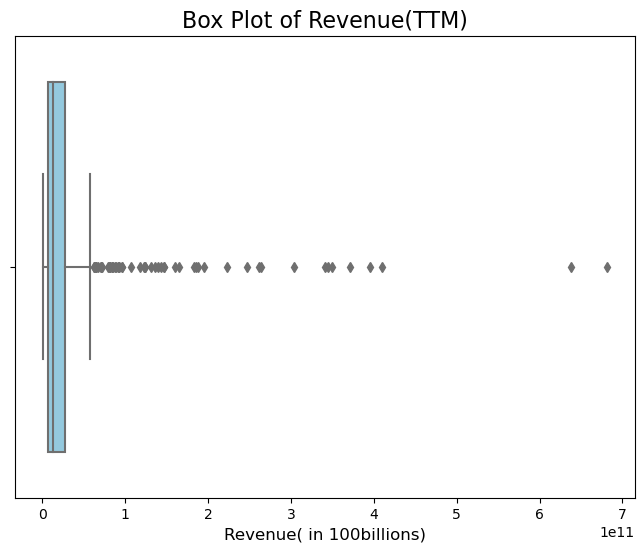

Number of outliers: 36


In [72]:
# Box plot to look at the distribution of variables 
import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.figure(figsize=(8, 6))

# create a box plot for 'CreditScore'
sns.boxplot(x=data["Revenue (TTM)"], color="skyblue")

# add title and labels
plt.title("Box Plot of Revenue(TTM)", fontsize=16)
plt.xlabel("Revenue( in 100billions)", fontsize=12)

# display the plot
plt.show()

def count_outliers(series):
    
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Example usage:
outlier_count = count_outliers(filtered_data["Revenue (TTM)"])
print("Number of outliers:", outlier_count)

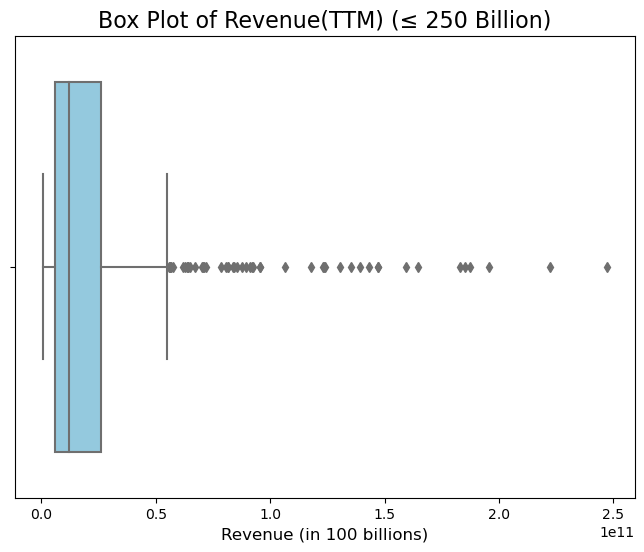

In [74]:
# Box plot to look at the distribution of variables 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data: only include companies with Revenue (TTM) less than or equal to 250 billion
filtered_data = data[data["Revenue (TTM)"] <= 250_000_000_000]

# set plot size
plt.figure(figsize=(8, 6))

# create a box plot for 'Revenue (TTM)' on filtered data
sns.boxplot(x=filtered_data["Revenue (TTM)"], color="skyblue")

# add title and labels
plt.title("Box Plot of Revenue(TTM) (≤ 250 Billion)", fontsize=16)
plt.xlabel("Revenue (in 100 billions)", fontsize=12)

# display the plot
plt.show()

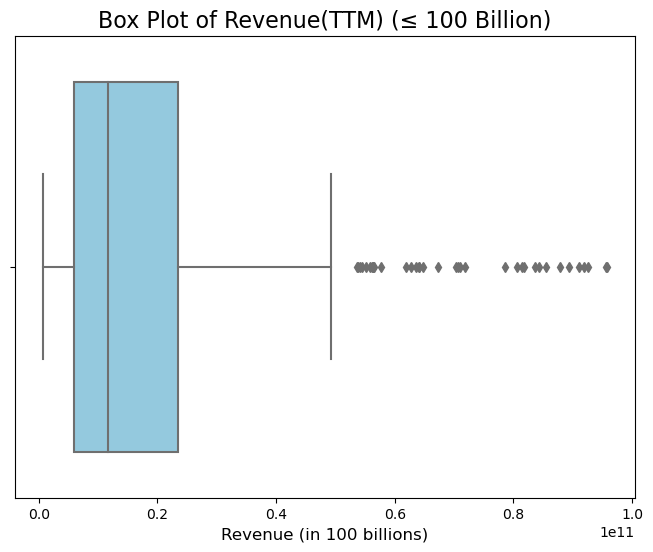

In [13]:
# Box plot to look at the distribution of variables 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data: only include companies with Revenue (TTM) less than or equal to 100 billion
filtered_data = data[data["Revenue (TTM)"] <= 100_000_000_000]

# set plot size
plt.figure(figsize=(8, 6))

# create a box plot for 'Revenue (TTM)' on filtered data
sns.boxplot(x=filtered_data["Revenue (TTM)"], color="skyblue")

# add title and labels
plt.title("Box Plot of Revenue(TTM) (≤ 100 Billion)", fontsize=16)
plt.xlabel("Revenue (in 100 billions)", fontsize=12)

# display the plot
plt.show()

#### the boxplot is heavily skewed to the right or positively skewed. Showing that most companies are small compared to a few mega-companies that absolutely dominate in revenue. 

In [16]:
# using descriptive stats to take a closer look at the numbers in the box plot  
descriptive_statistics = data["Revenue (TTM)"].describe()
descriptive_statistics

count    4.430000e+02
mean     3.420352e+10
std      7.062331e+10
min      7.058230e+08
25%      6.140454e+09
50%      1.267300e+10
75%      2.773650e+10
max      6.809850e+11
Name: Revenue (TTM), dtype: float64

#### I made box plots of EBITDA, Net Income, and Gross Profits too and all looked very similar to the revenue box plot 

In [19]:
# looking at the counts/frequency of risk 
risk = data['ESG risk'].value_counts()
print("Frequency Counts:")
print(risk)

Frequency Counts:
ESG risk
Low           215
Medium        168
High           45
Negligible     13
Severe          2
Name: count, dtype: int64


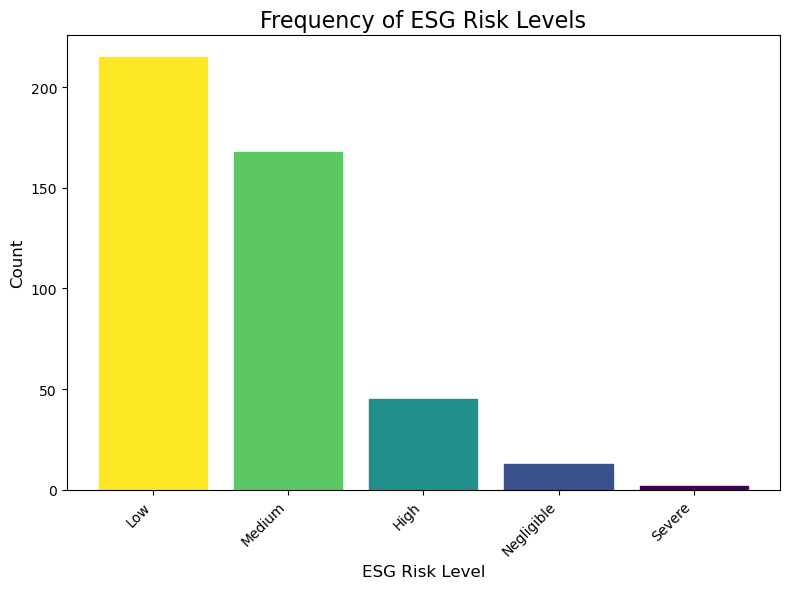

In [21]:


# Get frequency counts
risk = data['ESG risk'].value_counts()

# Create a bar chart with different colors
plt.figure(figsize=(8, 6))
bars = plt.bar(risk.index, risk.values, edgecolor='black')

# Apply different colors to each bar
colors = plt.cm.viridis_r(np.linspace(0, 1, len(bars)))  # Using a nice colormap
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add title and labels
plt.title("Frequency of ESG Risk Levels", fontsize=16)
plt.xlabel("ESG Risk Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# looking at the counts/frequency of each industry 
risk = data['Sector'].value_counts()
print("Frequency Counts:")
print(risk)

Frequency Counts:
Sector
Technology                79
Industrials               70
Healthcare                55
Consumer Cyclical         52
Financial Services        36
Consumer Defensive        32
Utilities                 30
Real Estate               30
Energy                    22
Basic Materials           19
Communication Services    18
Name: count, dtype: int64


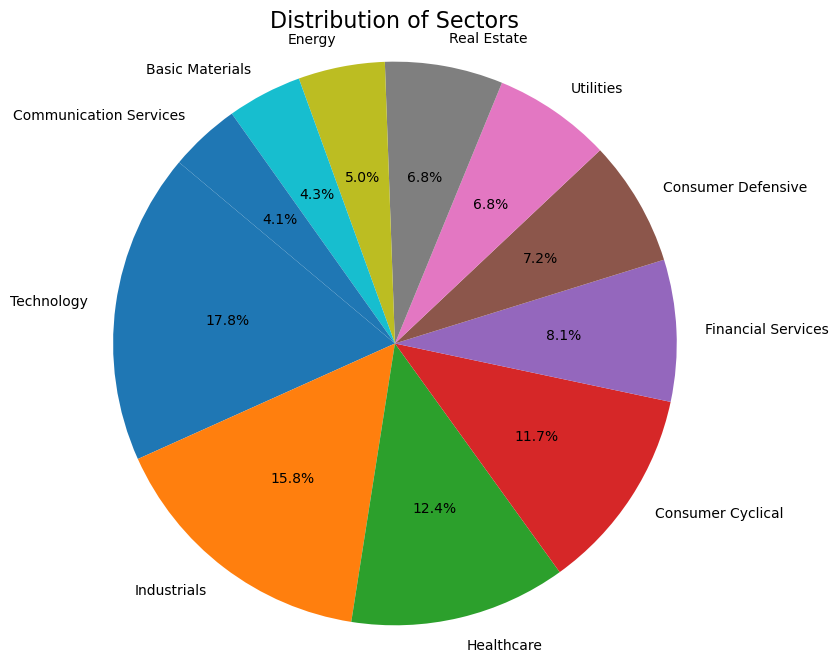

In [25]:
# Get frequency counts
risk = data['Sector'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk, labels=risk.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Sectors", fontsize=16)
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle
plt.show()

## Bivariate Statistics -- chose spearman correlation because this data is not normally distributed 

In [28]:
# Spearman Correlation between net income and ESG Score
spearman_corr = data["Net Income"].corr(data["ESG score"], method="spearman")

# display the result
print(f"Spearman Correlation: {spearman_corr:.4f}")

# interpretation
if abs(spearman_corr) < 0.3:
    print("Interpretation: No or weak monotonic correlation.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("Interpretation: Moderate monotonic correlation.")
else:
    print("Interpretation: Strong monotonic correlation.")

Spearman Correlation: 0.1198
Interpretation: No or weak monotonic correlation.


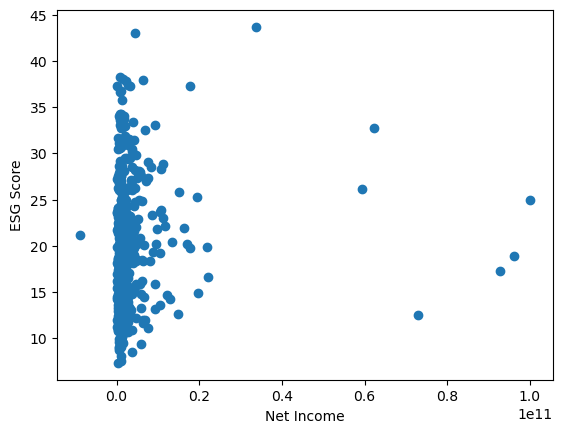

In [30]:
# Visualization
plt.scatter(data['Net Income'], data['ESG score'])
plt.xlabel("Net Income")
plt.ylabel("ESG Score")
plt.show()

In [32]:
# Spearman Correlation between Revenue and ESG Score
spearman_corr = data["Revenue (TTM)"].corr(data["ESG score"], method="spearman")

# display the result
print(f"Spearman Correlation: {spearman_corr:.4f}")

# interpretation
if abs(spearman_corr) < 0.3:
    print("Interpretation: No or weak monotonic correlation.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("Interpretation: Moderate monotonic correlation.")
else:
    print("Interpretation: Strong monotonic correlation.")

Spearman Correlation: 0.1811
Interpretation: No or weak monotonic correlation.


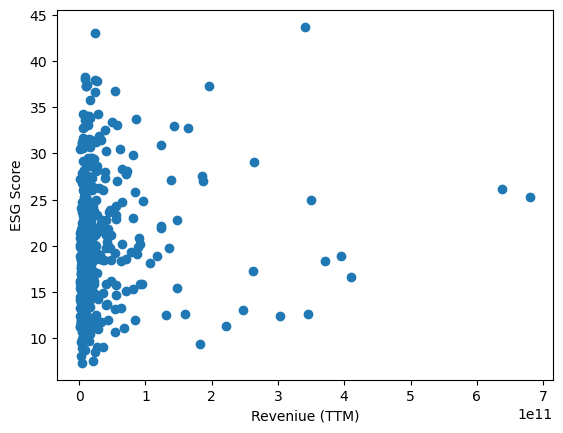

In [34]:
# Visualization
plt.scatter(data['Revenue (TTM)'], data['ESG score'])
plt.xlabel("Reveniue (TTM)")
plt.ylabel("ESG Score")
plt.show()

In [36]:
# Spearman Correlation between Market Cap and ESG Risk
spearman_corr = data["Market Cap"].corr(data["ESG Risk Numeric"], method="spearman")

# display the result
print(f"Spearman Correlation: {spearman_corr:}")

# interpretation
if abs(spearman_corr) < 0.3:
    print("Interpretation: No or weak monotonic correlation.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("Interpretation: Moderate monotonic correlation.")
else:
    print("Interpretation: Strong monotonic correlation.")

Spearman Correlation: -0.07501485239149092
Interpretation: No or weak monotonic correlation.


In [38]:
# Spearman Correlation between P/E Ratio and ESG score
spearman_corr = data["P/E Ratio"].corr(data["ESG score"], method="spearman")

# display the result
print(f"Spearman Correlation: {spearman_corr:}")

# interpretation
if abs(spearman_corr) < 0.3:
    print("Interpretation: No or weak monotonic correlation.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("Interpretation: Moderate monotonic correlation.")
else:
    print("Interpretation: Strong monotonic correlation.")

Spearman Correlation: -0.19897322899967906
Interpretation: No or weak monotonic correlation.


In [40]:
#### not a single one of these is correlating, or there is not enought data to make a statistically significant 

### Machine Learning
#### 1. We are going to do an importance chart 

In [43]:
#import machiene learning help 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = data[['P/E Ratio', 'Forward P/E', 'Revenue (TTM)', 'Gross Profits', 'Net Income', 'EBITDA', 'Market Cap']]
y = data['ESG Risk Numeric']  # Using numeric ESG risk values like 1, 2, 3, 4, 5


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Accuracy (optional check)
print('Random Forest Accuracy:', rf_model.score(X_test, y_test))

Random Forest Accuracy: 0.47191011235955055


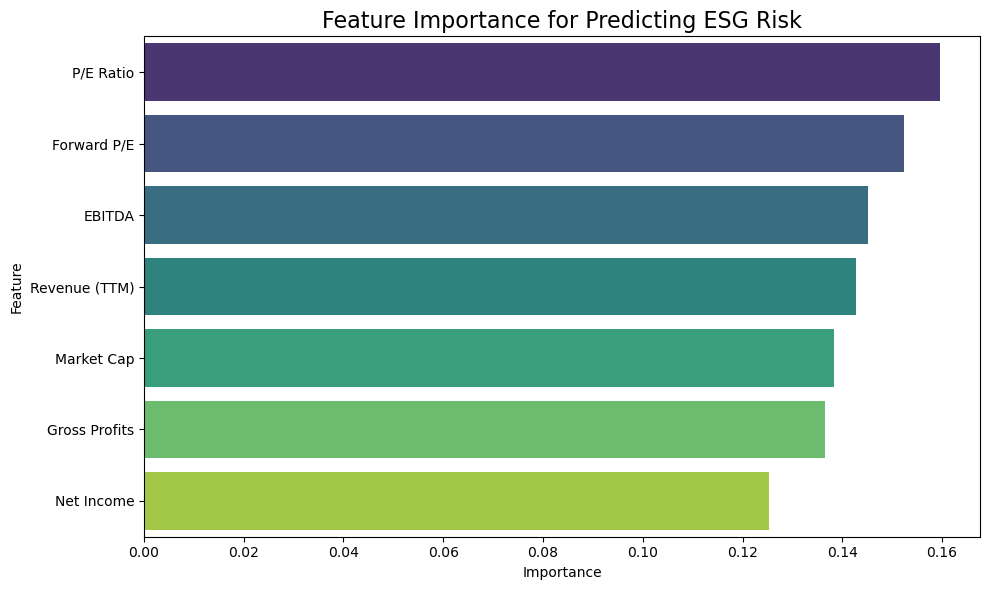

In [47]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a dataframe
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting ESG Risk', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### I am interested to see if splitting by sector will raise this accuracy level 

In [50]:
# Create dummy variables for Sector
sector_dummies = pd.get_dummies(data['Sector'], prefix='Sector')

# Concatenate sector dummies to your original X
X = pd.concat([data[['P/E Ratio', 'Forward P/E', 'Revenue (TTM)', 'Gross Profits', 
                     'Net Income', 'EBITDA', 'Market Cap']], sector_dummies], axis=1)

# Target stays the same
y = data['ESG Risk Numeric']

# Fill any missing values (if needed)
X = X.fillna(X.median())

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Accuracy
print('Accuracy after adding Sector:', rf_model.score(X_test, y_test))

Accuracy after adding Sector: 0.5168539325842697


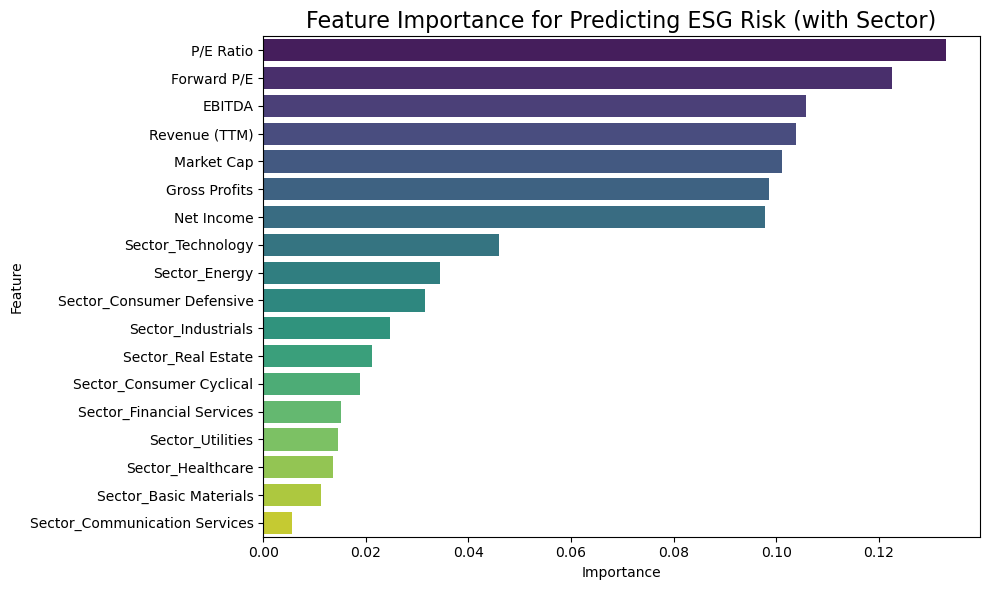

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a dataframe
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting ESG Risk (with Sector)', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### I think the imbalance of high and severe esg risk might be lessening the models accuary. To adress that I am going to try and adress the class imbalance 

In [59]:
# Train Random Forest with class_weight balanced
rf_model = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Accuracy
print('Accuracy after class balancing:', rf_model.score(X_test, y_test))

Accuracy after class balancing: 0.5168539325842697
